In [107]:
pip install pandas_datareader

In [108]:
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2022,1,1)

In [110]:
df_nifty=web.DataReader("^NSEI","yahoo",start,end)
df_nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [111]:
df_b=web.DataReader("BAJFINANCE.NS","yahoo",start,end)
df_b.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,5338.000000,5250.000000,5310.200195,5280.149902,1447187.0,5271.631836
2021-01-04,5324.000000,5196.200195,5324.000000,5216.200195,2333659.0,5207.785156
2021-01-05,5224.200195,5062.500000,5218.000000,5119.000000,3953400.0,5110.741699
2021-01-06,5168.350098,4990.299805,5130.000000,5030.299805,3607923.0,5022.184570
2021-01-07,5131.549805,5021.299805,5065.000000,5081.000000,3035750.0,5072.803223


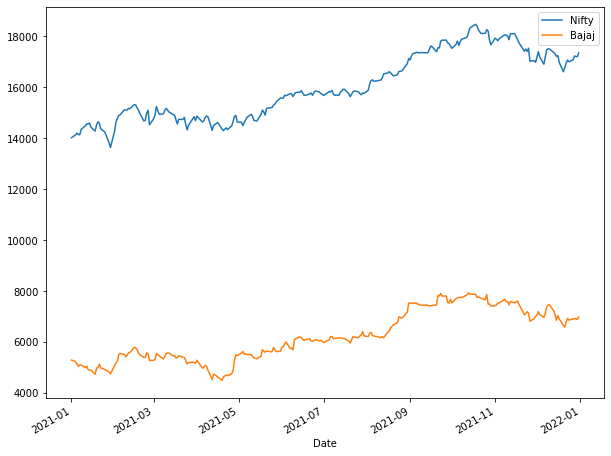

In [112]:
df_nifty['Close'].plot(label = 'Nifty', figsize=(10,8) )
df_b['Close'].plot(label = 'Bajaj')
plt.legend()

In [113]:
df_nifty['cum']=df_nifty["Close"]/df_nifty["Close"].iloc[0]
df_b['cum']=df_b["Close"]/df_b["Close"].iloc[0]


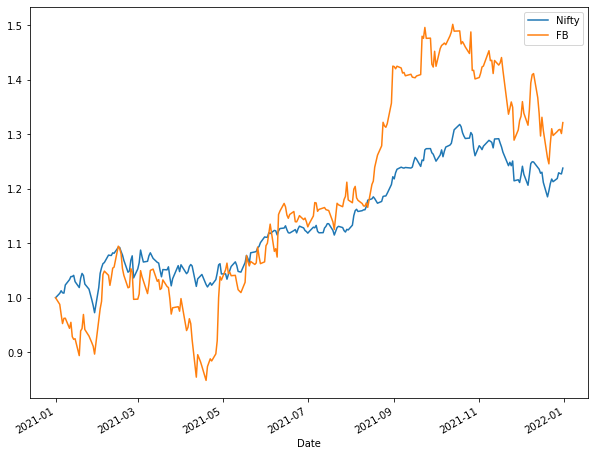

In [114]:
df_nifty['cum'].plot(label = 'Nifty', figsize=(10,8))
df_b['cum'].plot(label = 'FB')
plt.legend()

In [115]:
df_nifty['daily_ret'] = df_nifty['Close'].pct_change(1)
df_b['daily_ret'] = df_b['Close'].pct_change(1)

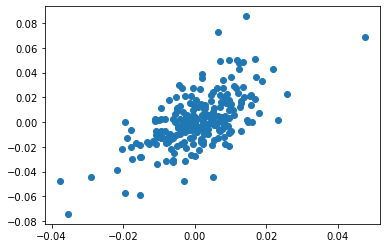

In [116]:
plt.scatter(df_nifty['daily_ret'],df_fb['daily_ret'])

In [117]:
LR = stats.linregress(df_b['daily_ret'].iloc[1:],df_nifty['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.3028960742957345, intercept=0.0005058653732726757, rvalue=0.6396327955262322, pvalue=8.058089332556864e-30, stderr=0.023255506783162176, intercept_stderr=0.00048523313437910556)

In [118]:
beta,alpha,r_val,p_val,std_err = LR

In [119]:
date=datetime.datetime(2022,6,8)

In [120]:
rm = df_nifty['daily_ret'].mean()*248
rm

0.22646634346329372

In [121]:
rf=0.04
rf

0.04

In [122]:
expected_return=rf+beta*(rm-rf)+alpha
expected_return

0.09698578879658444

In [123]:
ret=(df_b["Close"].iloc[0])+(expected_return*((df_b['Close']).iloc[0])*(((date-start).days)/248))
ret

6360.101677328015

In [124]:
df_baj=web.DataReader("BAJFINANCE.NS","yahoo",date,date)
df_baj

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-08,6054,5802.25,5900,5954.299805,1334146,5954.299805


In [125]:
error=(ret-df_baj["Close"].iloc[0])/(df_b["Close"].iloc[0])
error

0.07685423333538091